<h1>Analysis of sensor variation </h1>
<p>This notebook examines the noise associated with the MaxBotix LV-MaxSonar EZ0 Ultrasonic Rangefinder to assess the suitability for Kalman Filtering. The data was obtained during an experiment where obstacles were placed at 10 cm intervals away from the sensor<p>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [15]:
readings_df = pd.read_csv("EZ3.csv")
readings_df.head()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,752,23,24,34,37,55,87,67,58,89,80,118,121,128,149,145,165,151
1,773,25,23,28,42,47,57,81,77,94,99,107,119,130,138,179,163,159
2,781,27,24,16,39,59,70,68,68,88,96,139,112,143,167,150,160,153
3,740,23,24,30,43,49,59,68,79,89,97,106,119,129,148,148,159,154
4,765,21,35,29,37,50,60,67,115,108,112,107,143,133,140,146,163,169


In [16]:
readings_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,724.190000,24.550000,24.210000,32.000000,40.830000,51.900000,61.410000,71.050000,81.430000,90.700000,101.080000,110.600000,121.570000,133.260000,139.630000,151.200000,158.600000,160.070000
std,86.395227,9.869221,8.025584,10.601124,9.556906,9.638412,8.528141,11.295279,10.498923,10.830652,9.794536,9.637888,11.675109,17.152683,8.393907,9.543097,9.569522,12.141635
min,354.000000,0.000000,4.000000,8.000000,16.000000,28.000000,40.000000,48.000000,58.000000,50.000000,80.000000,88.000000,96.000000,41.000000,120.000000,125.000000,138.000000,136.000000
25%,740.000000,21.750000,22.000000,28.000000,37.000000,48.000000,57.000000,67.750000,77.000000,87.750000,97.000000,107.000000,117.750000,128.000000,137.000000,147.000000,155.000000,153.000000
50%,747.000000,23.000000,23.000000,30.000000,39.000000,49.000000,59.000000,69.000000,79.000000,89.000000,99.000000,109.000000,119.000000,130.000000,139.000000,149.000000,157.500000,157.000000
75%,753.250000,27.000000,26.000000,34.000000,42.250000,53.250000,63.000000,73.000000,83.250000,93.000000,102.000000,112.250000,123.000000,140.250000,141.000000,153.250000,161.250000,167.250000
max,796.000000,54.000000,53.000000,63.000000,70.000000,95.000000,95.000000,127.000000,127.000000,128.000000,127.000000,147.000000,151.000000,167.000000,167.000000,183.000000,189.000000,207.000000


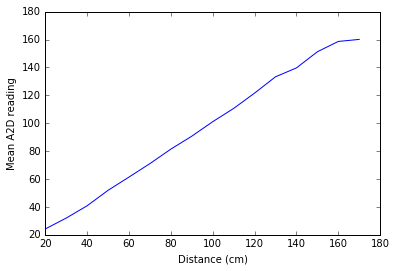

In [17]:
# plot of mean reading against distance to gain an idea of the relationship between 
distances = range(20,180,10)
# mean readings for each column
mean_readings = pd.DataFrame.mean(readings_df, axis=0)
plt.plot(distances, mean_readings[2:])
plt.xlabel('Distance (cm)')
plt.ylabel('Mean A2D reading')


<h2>Relationship between A2D and Distance</h2>
<p>The relationship appears to be linear for a large part of the graph between 30 and 110 cm as expected, but surprisingly the readings after this point begin to plateau despite changes in distance. This could be due to false readings from the hallway as the wave is very wide at that point in time</p>

In [18]:
# Converting readings to distances
def convert_to_cm(reading):
    # manufacturer states the reading / 2 gives the distance in inches. Multiply by 2.54 to get cm
    #return reading/2 * 2.54
    return reading
distance_readings_df = pd.DataFrame.copy(readings_df)

for i in distance_readings_df:
    distance_readings_df[i] = distance_readings_df[i].map(convert_to_cm)
    
distance_readings_df.head()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,752,23,24,34,37,55,87,67,58,89,80,118,121,128,149,145,165,151
1,773,25,23,28,42,47,57,81,77,94,99,107,119,130,138,179,163,159
2,781,27,24,16,39,59,70,68,68,88,96,139,112,143,167,150,160,153
3,740,23,24,30,43,49,59,68,79,89,97,106,119,129,148,148,159,154
4,765,21,35,29,37,50,60,67,115,108,112,107,143,133,140,146,163,169


In [19]:
# summary stats for distance readings
distance_readings_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,724.190000,24.550000,24.210000,32.000000,40.830000,51.900000,61.410000,71.050000,81.430000,90.700000,101.080000,110.600000,121.570000,133.260000,139.630000,151.200000,158.600000,160.070000
std,86.395227,9.869221,8.025584,10.601124,9.556906,9.638412,8.528141,11.295279,10.498923,10.830652,9.794536,9.637888,11.675109,17.152683,8.393907,9.543097,9.569522,12.141635
min,354.000000,0.000000,4.000000,8.000000,16.000000,28.000000,40.000000,48.000000,58.000000,50.000000,80.000000,88.000000,96.000000,41.000000,120.000000,125.000000,138.000000,136.000000
25%,740.000000,21.750000,22.000000,28.000000,37.000000,48.000000,57.000000,67.750000,77.000000,87.750000,97.000000,107.000000,117.750000,128.000000,137.000000,147.000000,155.000000,153.000000
50%,747.000000,23.000000,23.000000,30.000000,39.000000,49.000000,59.000000,69.000000,79.000000,89.000000,99.000000,109.000000,119.000000,130.000000,139.000000,149.000000,157.500000,157.000000
75%,753.250000,27.000000,26.000000,34.000000,42.250000,53.250000,63.000000,73.000000,83.250000,93.000000,102.000000,112.250000,123.000000,140.250000,141.000000,153.250000,161.250000,167.250000
max,796.000000,54.000000,53.000000,63.000000,70.000000,95.000000,95.000000,127.000000,127.000000,128.000000,127.000000,147.000000,151.000000,167.000000,167.000000,183.000000,189.000000,207.000000


In [20]:
# calculate noise by subtracting value of true distance (denoted by column headings)
noise_df = pd.DataFrame.copy(distance_readings_df)
true_distances = range(10,180,10)

for i in true_distances:
    index = str(i)
    noise_df[index] = np.array(noise_df[index] - i)

noise_df.head()
    


,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,752,13,4,4,-3,5,27,-3,-22,-1,-20,8,1,-2,9,-5,5,-19
1,773,15,3,-2,2,-3,-3,11,-3,4,-1,-3,-1,0,-2,29,3,-11
2,781,17,4,-14,-1,9,10,-2,-12,-2,-4,29,-8,13,27,0,0,-17
3,740,13,4,0,3,-1,-1,-2,-1,-1,-3,-4,-1,-1,8,-2,-1,-16
4,765,11,15,-1,-3,0,0,-3,35,18,12,-3,23,3,0,-4,3,-1


In [21]:
# summary stats for noise df
noise_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,724.190000,14.550000,4.210000,2.000000,0.830000,1.900000,1.410000,1.050000,1.430000,0.700000,1.080000,0.600000,1.570000,3.260000,-0.370000,1.200000,-1.400000,-9.930000
std,86.395227,9.869221,8.025584,10.601124,9.556906,9.638412,8.528141,11.295279,10.498923,10.830652,9.794536,9.637888,11.675109,17.152683,8.393907,9.543097,9.569522,12.141635
min,354.000000,-10.000000,-16.000000,-22.000000,-24.000000,-22.000000,-20.000000,-22.000000,-22.000000,-40.000000,-20.000000,-22.000000,-24.000000,-89.000000,-20.000000,-25.000000,-22.000000,-34.000000
25%,740.000000,11.750000,2.000000,-2.000000,-3.000000,-2.000000,-3.000000,-2.250000,-3.000000,-2.250000,-3.000000,-3.000000,-2.250000,-2.000000,-3.000000,-3.000000,-5.000000,-17.000000
50%,747.000000,13.000000,3.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-2.500000,-13.000000
75%,753.250000,17.000000,6.000000,4.000000,2.250000,3.250000,3.000000,3.000000,3.250000,3.000000,2.000000,2.250000,3.000000,10.250000,1.000000,3.250000,1.250000,-2.750000
max,796.000000,44.000000,33.000000,33.000000,30.000000,45.000000,35.000000,57.000000,47.000000,38.000000,27.000000,37.000000,31.000000,37.000000,27.000000,33.000000,29.000000,37.000000


In [22]:
# get overall noise
distances = range(20,180,10)
indexes = [str(i) for i in distances ]
overall_noise = pd.Series([])

for i in indexes:
    overall_noise = overall_noise.append(noise_df[i]).reset_index(drop=True)
    
overall_noise


0        4
1        3
2        4
3        4
4       15
5      -16
6        4
7        1
8        2
9        6
10       2
11      11
12       3
13       2
14     -16
15       3
16     -12
17       3
18      -5
19       3
20       5
21       1
22       2
23       1
24       1
25     -12
26       1
27      15
28       3
29      10
        ..
1570   -18
1571   -13
1572   -19
1573    -3
1574   -18
1575    -4
1576    21
1577    -2
1578    -1
1579    15
1580   -19
1581     1
1582     5
1583     0
1584     9
1585     1
1586    -3
1587    -3
1588    -1
1589    -3
1590   -26
1591     1
1592    -2
1593    -4
1594    -1
1595    -2
1596    11
1597    -3
1598    -3
1599    37
dtype: int64

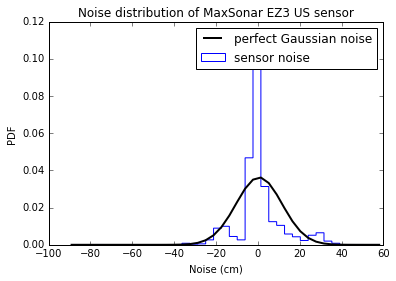

In [23]:
xs = np.linspace(overall_noise.min(), overall_noise.max() + 1, num=40)
overall_noise_plt = plt.hist(overall_noise, normed=True, bins = xs, histtype='step', label='sensor noise')
plt.title('Noise distribution of MaxSonar EZ3 US sensor')
plt.xlabel('Noise (cm)')
plt.ylabel('PDF')

norm = stats.norm(overall_noise.mean(), overall_noise.std())
plt.plot(xs, norm.pdf(xs), color='k', lw=2, label='perfect Gaussian noise')
plt.legend()
plt.savefig("EZ3_overall_noise.png")



In [24]:
overall_noise.describe()

count    1600.000000
mean        0.596250
std        10.995968
min       -89.000000
25%        -3.000000
50%        -1.000000
75%         3.000000
max        57.000000
dtype: float64